<a href="https://colab.research.google.com/github/Ken-huea/Time-series-analysis/blob/main/Deep_Learning%E6%95%B0%E5%80%A4%E4%BA%88%E6%B8%AC_My_Best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## kerasの概要

[動画はこちらです。](https://www.youtube.com/watch?v=cLYxrymLWaI)

ガチ予想

ポイント①callback関数を使用。
- callbacks.EarlyStopping(monitor='val_loss',patience=30),
- callbacks.ModelCheckpoint(filepath = './model/best_model.h5',monitor='', save_best_only=True)

Kerasは，Pythonで書かれた高水準のニューラルネットワークライブラリです。

Tensorflow,Pytorchなどと並び、Pythonエンジニアには広く用いられているライブラリです。

 特徴
+ **直感的に使用できる**

ニューラルネットの基本構造がわかっていれば、詳細なアルゴリズムの知識なしに、ニューラルネットの構築が可能です。

+ **様々なアルゴリズムを搭載**

単純なニューラルネットだけでなく、CNN,RNN,GRU,LSTMなど、幅広いアルゴリズムに対応しています。
既存のアルゴリズムを使用することは勿論、独自のニューラルネットも簡単に構築できます。

+ **GPUをサポート**

ニューラルネットはCPUで処理するより、GPUで処理したほうが数倍～数百倍速くなります。

**公式：**https://keras.io/ja/

 下記で通常のディープラーニングを行ってみる

[アイデミー学習](https://premium.aidemy.jp/courses/5090/exercises/BJB85hLsIlG)

## データ生成
データインポートと正規化。そして分割

In [ ]:
# 連続値データの読み込み。データはload_boston
from sklearn.datasets import load_boston
boston = load_boston()
boston

In [ ]:
# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston['data'],       #説明変数 
    boston['target'],     #目的変数
    random_state=42
)

# それぞれを正規化（Normarization）
from sklearn.preprocessing import MinMaxScaler
#これは何なんだよ。
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_n = scaler_x.fit_transform(X_train)
X_test_n = scaler_x.transform(X_test) 
y_train_n = scaler_y.fit_transform(y_train.reshape(len(y_train),1))
y_test_n = scaler_y.transform(y_test.reshape(len(y_test),1)) 

## モデルの作成
中間層は少な目のディープラーニングモデル作成

In [ ]:
# 基本モデル,インスタンスの作成。そこに中間層を付け加える。
from keras.models import Sequential # 基本モデルのクラス
model = Sequential()

modelに層を追加していきましょう。

層のモジュールをインポートして層を追加

In [ ]:
from keras.layers import Dense # 層
from keras.layers import core  # 活性化関数
from keras.layers import ReLU  # 活性化関数発展版

Denceの引数を与えたものをaddする。

In [ ]:
# 中間層
model.add(
    Dense(
        128,# ユニット数 
        input_shape=(13,), # 入力ベクトルの次元数の指定
        activation=ReLU()  # 活性化関数　ReLU
    )
)

# 出力層
model.add(
    Dense(
        1,# ユニット数  
        activation=core.Activation('linear')     # 活性化関数(高等関数)　linear
    )
)

In [ ]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.001, clipnorm=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
import tensorflow as tf
# モデルの学習設定
from keras import losses     # 損失関数
from keras import optimizers # 重み更新法
model.compile(
    loss=losses.mean_squared_error,    # 平均二乗誤差を損失関数として指定。
    optimizer=sgd, # 重み更新法　確率的勾配降下法. 最適下法　学習率(Ir = 0.001)
)

## モデルの学習
①スタンダード

patience=10 : 様子見するエポック数 10回やっても改善しなければもう打ち切り。

 filepath = './model/best_model.h5',monitor='', save_best_only=True　最適なモデルの保存先

In [ ]:
# ハイパーパラメータ
batch_size = 128  # バッチサイズ 32,64,128,256,512 あたり
epochs = 10       # エポック数(学習の繰り返し回数)
val_split = 0,1   # 訓練データのうちx%をvalidation dataとして分割して使います。
pati_time = 10    # y回学習しても向上しない場合は学習を打ち切ります。

In [ ]:
from keras import callbacks                   # コールバック（1epoch終了毎に呼び出される）

    # 構築したモデルで学習（学習データ:trainのうち、10％を検証データ:validationとして使用）
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=val_split,
                        callbacks=[
                            callbacks.EarlyStopping(monitor='val_loss',patience = pati_time),
                            callbacks.ModelCheckpoint(filepath = './model/best_model.h5',monitor='val_loss', save_best_only=True)
                            ]
                    )

In [ ]:
# loss の 学習過程のプロット

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))

plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")

plt.legend()


# accuracy の 学習過程のプロット
plt.figure(figsize=(10,6))
# 学習過程のプロット
plt.plot(history.epoch, history.history["accuracy"], label="accuancy")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")

plt.legend()

## 予測値算出
乖離とrmse

機械学習のスタンダード。データをトレインとテストに分割してテストで予測値を算出。

In [ ]:
# 予測値の算出
y_predict_n = model.predict(X_test_n)
# 正規化の復元 元に戻す事。
y_predict = scaler_y.inverse_transform(y_predict_n)
print(y_predict)

乖離度の算出 実測値と予測値との乖離がどのくらいあるのか。

In [ ]:
import numpy as np
np.mean(
    np.abs(y_test-y_predict.flatten())
    /y_test
)

0.18602202060996578

rmseの予測

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
# y_trainと予測値のRMSEを出す
print("RMSE",np.sqrt(MSE(y_test,y_predict)))

RMSE 5.451853377521288


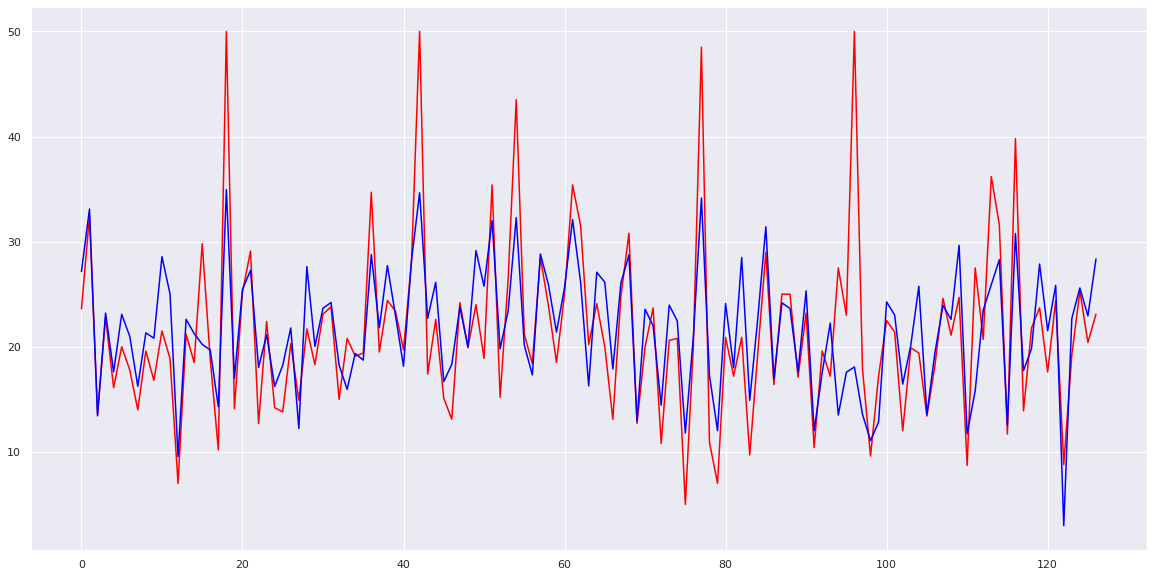

In [ ]:
plt.figure(figsize=(20, 10))

#1つ目のデータをplotメソッドでプロット
plt.plot(y_test, color = 'red')

#2つ目のデータをplotメソッドでプロット
plt.plot(y_predict, color = 'blue')
plt.show()


## 考察

rmseは数値上では有効。しかしスパイク部分が全く予測できていない。

あらゆるハイパーパラメータはデフォルトのまま。そこをどう理解して調整するか確認する。

⇒　グリッドサーチやランダムサーチのやり方があるのかな？

予測値算出の際のグラフ、x軸の値が分からない。
おそらくy軸が目的変数。x軸が説明変数。

データ生成の際の下記の部分をよく理解していない。

```
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
```

